# 美しい地図を作りましょう

<img src="images/better maps.png">

matplotlib を使用してマップを作成する方法を学習しました。 このラボでは、マップ フィーチャの変更、ベースマップの追加、タイトルの作成などにより、これらのマップをさらに磨き上げる方法を学びます。

*注意

matplotlib には日本語フォント表示に関する問題があります。 Mac と PC のどちらを使用しているかに応じて、以下の適切なフォント ファミリを設定してください。

In [25]:
import geopandas as gpd
import contextily as ctx
import plotly.express as px

# set font
import matplotlib as mpl

# for Mac
# mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
mpl.rc('font',family='MS Gothic')


## Get data

まずはe-Statのサイトにアクセス。そこから次に手順でデータをダウンロードして今週のフォルダーに入れる：

➡️ https://www.e-stat.go.jp/

➡️ 地図

➡️ 統計データダウンロード

➡️ 境界データ

➡️ 小地域

➡️ 国勢調査

➡️ 2020年

➡️ 小地域（基本単位区）（JGD2000）

➡️ 世界測地系緯度経度・Shapefile

➡️ 12 千葉県

➡️ 12217 柏市

In [2]:
gdf = gpd.read_file('B002005212020DDSWC12217.zip')

In [3]:
# explore the data
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   KEY_CODE   6178 non-null   object  
 1   PREF       6178 non-null   object  
 2   CITY       6178 non-null   object  
 3   K_AREA     6178 non-null   object  
 4   S_AREA     6178 non-null   object  
 5   PREF_NAME  6178 non-null   object  
 6   CITY_NAME  6178 non-null   object  
 7   S_NAME     6178 non-null   object  
 8   KIGO_E     2 non-null      object  
 9   HCODE      6178 non-null   int64   
 10  AREA       6178 non-null   float64 
 11  PERIMETER  6178 non-null   float64 
 12  KIHON1     6178 non-null   object  
 13  DUMMY1     6178 non-null   object  
 14  KIHON2     6178 non-null   object  
 15  KIHON3     6178 non-null   object  
 16  C1         6178 non-null   int64   
 17  C2         6178 non-null   int64   
 18  DUMMY2     6178 non-null   object  
 19  C3         6178 non

In [4]:
gdf.head()

KEY_CODE PREF CITY     K_AREA   S_AREA PREF_NAME CITY_NAME S_NAME   
0  122170001101   12  217  018005060  0001101       千葉県        柏市   柏五丁目  \
1  122170001102   12  217  018005070  0001102       千葉県        柏市   柏五丁目   
2  122170001103   12  217  018005090  0001103       千葉県        柏市   柏五丁目   
3  122170001104   12  217  018005100  0001104       千葉県        柏市   柏五丁目   
4  122170001105   12  217  018005110  0001105       千葉県        柏市   柏五丁目   

  KIGO_E  HCODE  ...      KEYCODE1  JINKO SETAI KEN_OLD CITY_OLD      X_CODE   
0    NaN   8101  ...  2170001-1-01     29    14      12      217  139.975581  \
1    NaN   8101  ...  2170001-1-02     56    37      12      217  139.975826   
2    NaN   8101  ...  2170001-1-03      0     0      12      217  139.974888   
3    NaN   8101  ...  2170001-1-04      0     0      12      217  139.976011   
4    NaN   8101  ...  2170001-1-05     15    15      12      217  139.977300   

      Y_CODE      KCODE1  CCODE1   
0  35.865574  0180-05060  1-1- 1  \
1  35.866425  0180-05070  1-1- 2   
2  35.866766  0180-05090  1-1- 3   
3  35.868092  0180-05100  1-1- 4   
4  35.867969  0180-05110  1-1- 5   

                                            geometry  
0  POLYGON ((139.97627 35.86568, 139.97647 35.865...  
1  POLYGON ((139.97627 35.86568, 139.97603 35.865...  
2  POLYGON ((139.97576 35.86743, 139.97553 35.867...  
3  POLYGON ((139.97692 35.86849, 139.97680 35.868...  
4  POLYGON ((139.97785 35.86753, 139.97779 35.867...  

[5 rows x 38 columns]

ではとりあえずシンプルにマップを作ろう。`ax`という変数に入れます。

😮ところで、なぜ `ax` なの？これは `axes` の略で、このような matplotlib を使ったグラフやマップによく使われる関数です。

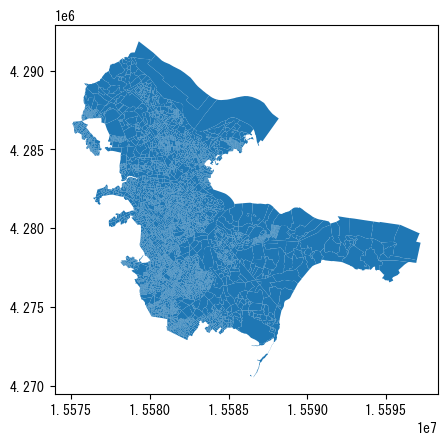

In [26]:
ax = gdf.plot()

データには既に「JINKO」のカラムがあるので、これを使ってコロプレス（choropleth）マップを作ろう。
- `column='JINKO'`
- `legend=True`

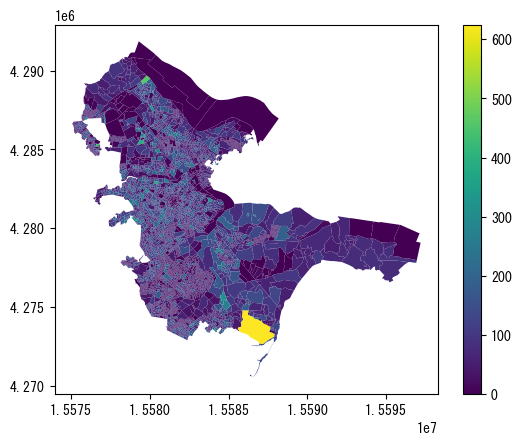

In [28]:
# population map
ax = gdf.plot(column='JINKO',
         legend=True)

## Size

マップのサイズを変更
- `figsize=(10,10)`

2 つの数字はマップの幅と高さを示しますが、マップされるデータの形状に応じてサイズが変化する可能性があります。

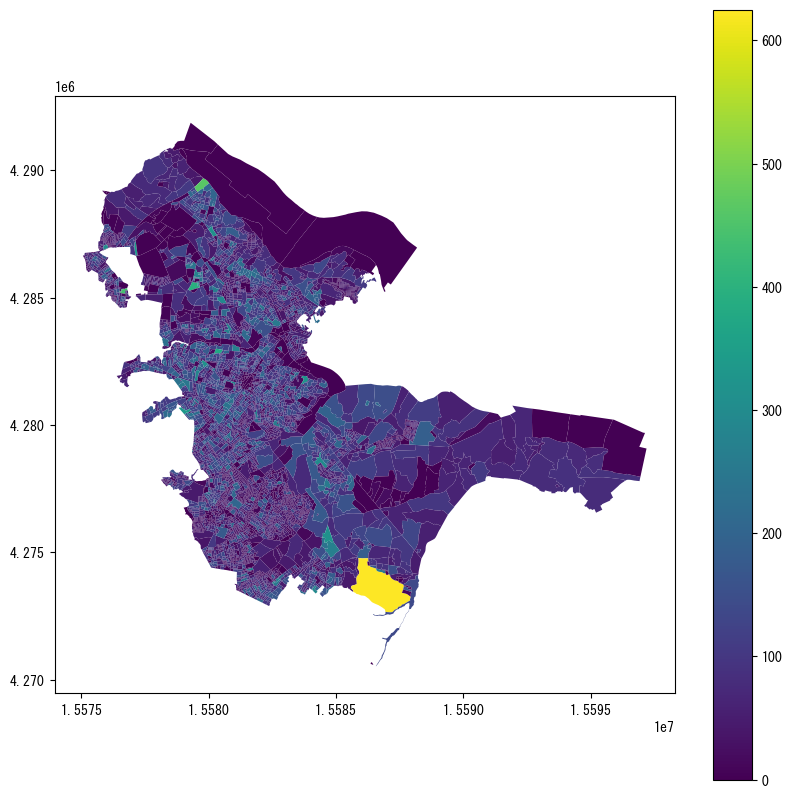

In [29]:
# population map
ax = gdf.plot(figsize=(10,10),
         column='JINKO',
         legend=True)

## Color

`cmap` 引数を設定して、次の選択肢からコロプレス マップのカラー パレットを割り当てることができます。なお、色の方向を変えるには `_r` を付け加えればいい。

例：　
- `cmap='autumn'`
- `cmap='autumn_r'`

<img src="images/sphx_glr_colormaps_002.webp">
<img src="images/sphx_glr_colormaps_003.webp">
<img src="images/sphx_glr_colormaps_004.webp">

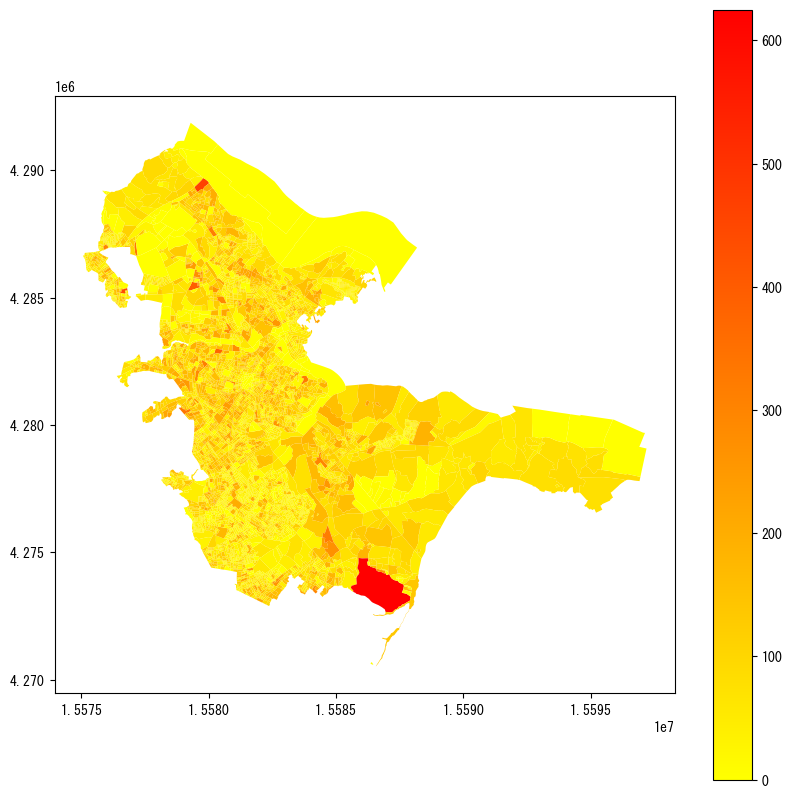

In [30]:
# population map
ax = gdf.plot(figsize=(10,10),
         column='JINKO',
         legend=True,
         cmap='autumn_r')

## Lines

次の引数を使用して、ポリゴンの境界線の幅と色を変更できます。

- `edgecolor='black'`
- `linewidth=0.1`

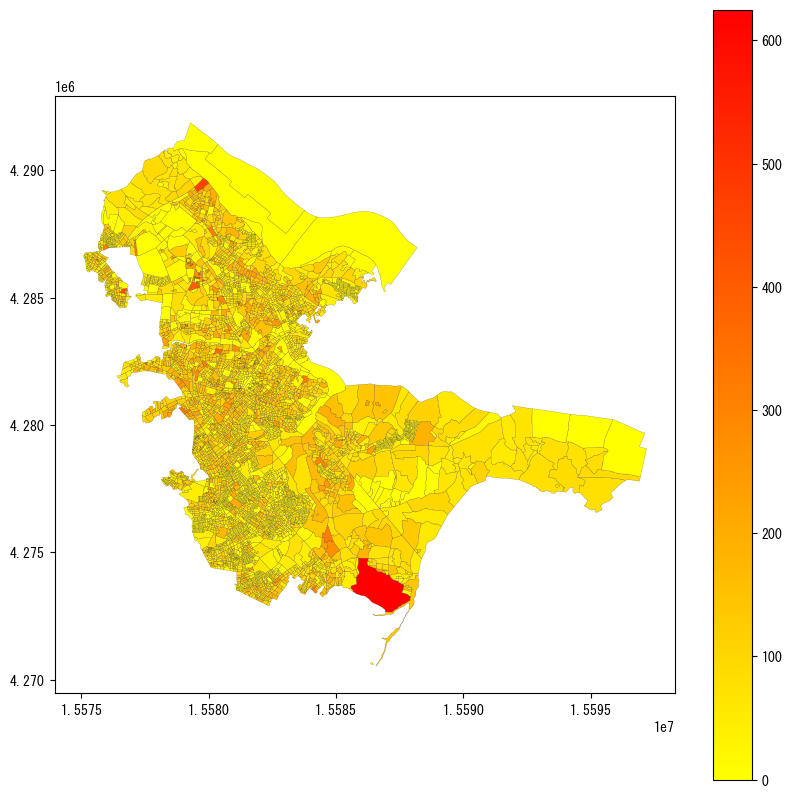

In [31]:
# population map
ax = gdf.plot(figsize=(10,10),
         column='JINKO',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1)

## Hide Axes

軸を非表示にするには、コード内に新しい行を作成し、`ax` 変数にアクセスする必要があります。

- `ax.axis('off')`


(15573959.591212062, 15598296.67607782, 4269461.075070321, 4292928.239715839)

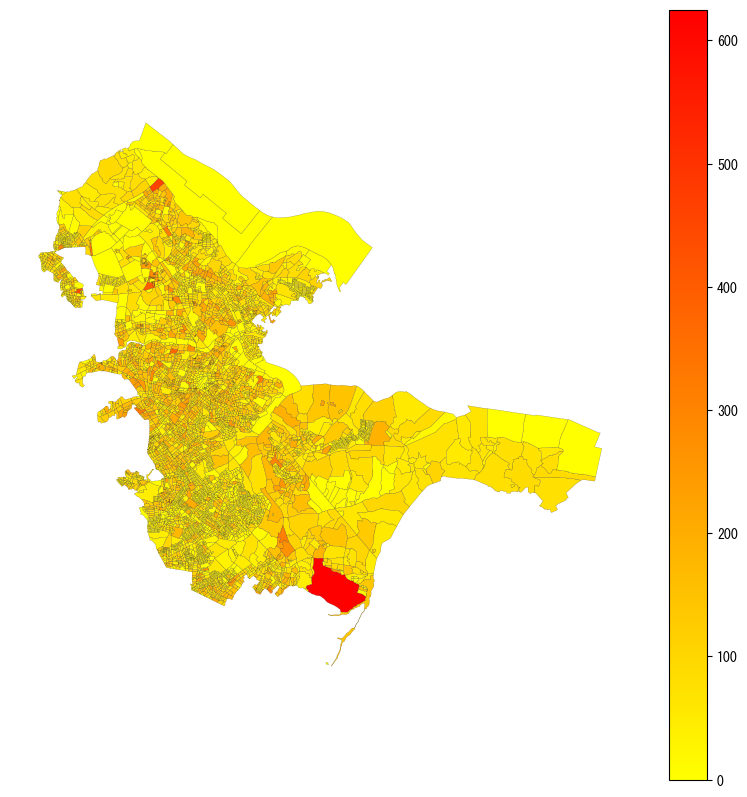

In [32]:
# population map
ax = gdf.plot(figsize=(10,10),
         column='JINKO',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1)

# hide axes
ax.axis('off')

## Title

マップのタイトルを設定するには、`ax` 変数を参照する別のコード行を追加する必要があります。

なお、日本語フォントの設定する必要があるのでMACかPCによって違うので注意：

Windows PC:
- `ax.set_title('柏市の人口',fontsize=24, fontname='MS Gothic');`

Mac:
- `ax.set_title('柏市の人口',fontsize=24, fontname='Hiragino Maru Gothic Pro');`

Text(0.5, 1.0, '柏市の人口')

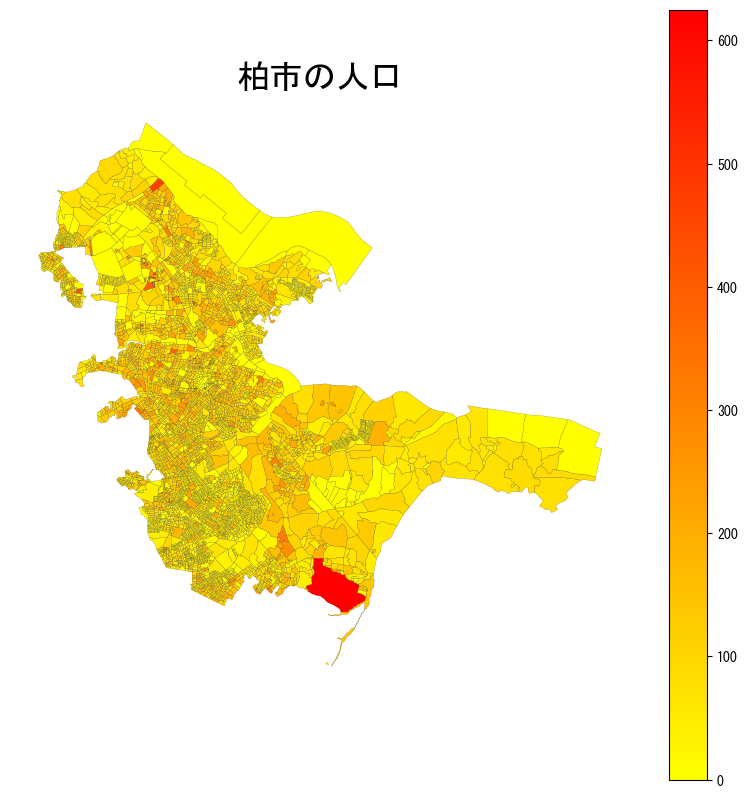

In [33]:
# population map
ax = gdf.plot(figsize=(10,10),
         column='JINKO',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1)

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口',fontsize=24)

## Basemap

ベースマップを足すには複数のステップが必要となる。

まずはベースマップを提供しているモジュール【contextily】をimportする。

In [14]:
import contextily as cx

次はデータをcontextilyがサポートしている地図投影法に変換する必要がある。

え？地図投影法とは？

## Projections

<img src="images/projections.png">

https://www.esrij.com/gis-guide/coordinate-and-spatial/coordinate-system/


https://ja.wikipedia.org/wiki/%E5%9C%B0%E5%9B%B3%E6%8A%95%E5%BD%B1%E6%B3%95%E3%81%AE%E4%B8%80%E8%A6%A7

緯度経度 (latitude,longitude) で表されているデータの地理座標系のcrs番号は `4326`だがcontextilyのベースマップは【Web メルカトル】という投影座標系を使っていて、その crs番号は `3857` である。

In [15]:
# change projection for your data to match basemap
gdf=gdf.to_crs(3857)

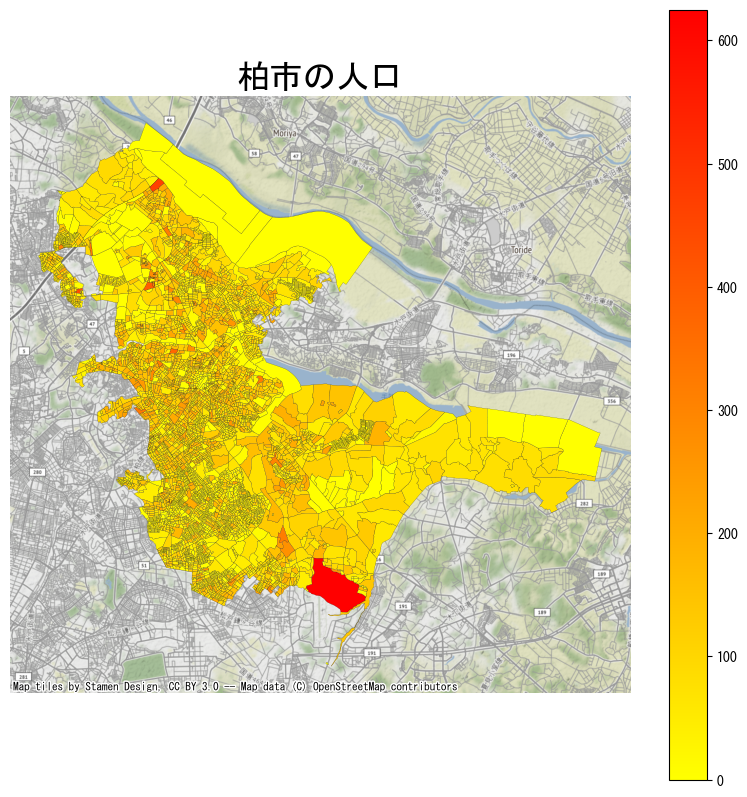

In [34]:
# population map
ax = gdf.plot(figsize=(10,10),
         column='JINKO',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1)

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口',fontsize=24);

# add basemap
cx.add_basemap(ax)

## Transparency

コロプレス レイヤーに少し透明度を追加して、ベースマップ上にシームレスに「浮かせる」ことができます。

- `alpha=0.8`

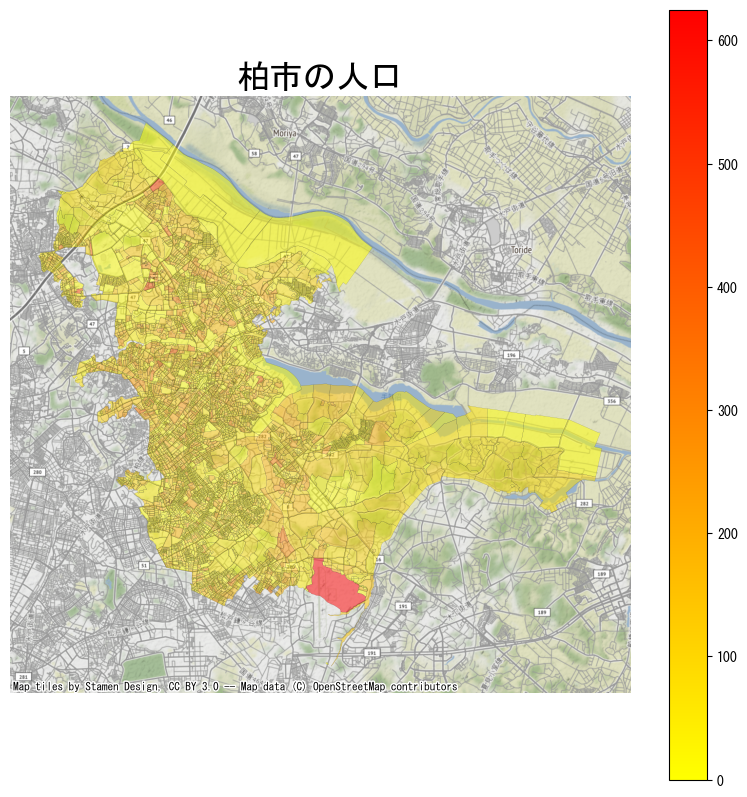

In [35]:
# population map
ax = gdf.plot(figsize=(10,10),
         column='JINKO',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.5)

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口',fontsize=24);

# add basemap
cx.add_basemap(ax)

## Basemap options

- source=cx.providers.CartoDB.Positron
- source=cx.providers.CartoDB.DarkMatter
- source=cx.providers.Stamen.TonerLite

- source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg'
- source='https://cyberjapandata.gsi.go.jp/xyz/blank/{z}/{x}/{y}.png'

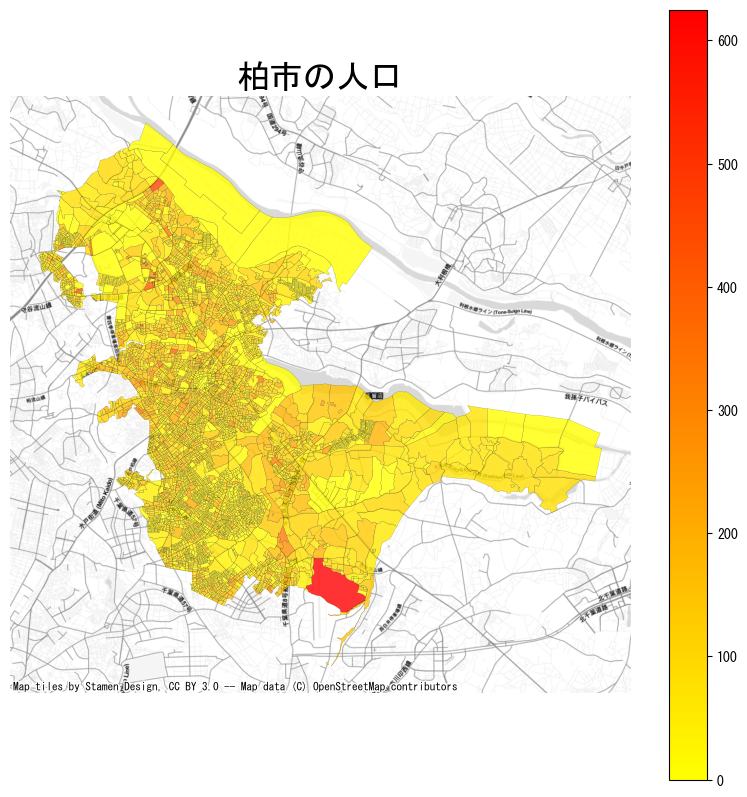

In [36]:
# population map
ax = gdf.plot(figsize=(10,10),
         column='JINKO',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8)

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口',fontsize=24);

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

# Exercise

「SETAI」を示す地図を作成しましょう。 それに応じてタイトルを変更してください。 マップのさまざまな色を試してください。

Text(0.5, 1.0, '柏市の世帯')

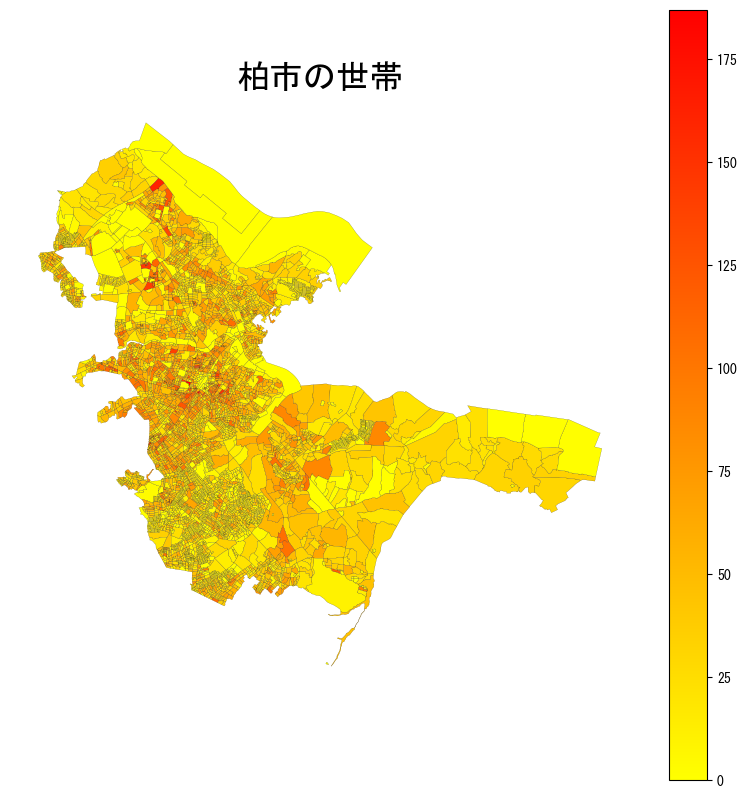

In [38]:
# population map
ax = gdf.plot(figsize=(10,10),
         column='SETAI',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1)

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の世帯',fontsize=24)

# 今日の課題

仮にあなたがマップ会社のインターンだとして、クライアントに「柏市で人口の最も多い街トップ10は？チャートと地図を作ってくれない？」とお願いされた。



## トップ１０を出すにはデータをソートする

データを JINKO で降順に並べ替えて、最も人口の多い町が上位に来るようにします。データフレームをソートするには

- `gdf.sort_values(by='JINKO')`

多い数字を上にするには

- `gdf.sort_values(by='JINKO' ascending=False)`


In [39]:
gdf = gdf.sort_values(by='JINKO', ascending=False )
gdf

KEY_CODE PREF CITY     K_AREA   S_AREA PREF_NAME CITY_NAME  S_NAME   
5534    1221727606   12  217  131000370    27606       千葉県        柏市     藤ケ谷  \
4996  122172488102   12  217  087003030  2488102       千葉県        柏市   船戸三丁目   
4523  122172278401   12  217  069007060  2278401       千葉県        柏市   西原七丁目   
2017  122171293101   12  217  104000150  1293101       千葉県        柏市      若柴   
1774    1221711391   12  217  035002420    11391       千葉県        柏市     篠籠田   
...            ...  ...  ...        ...      ...       ...       ...     ...   
4859  122172403102   12  217  022106020  2403102       千葉県        柏市  柏の葉六丁目   
2351  122171463103   12  217  071002510  1463103       千葉県        柏市      根戸   
2359  122171466102   12  217  072000010  1466102       千葉県        柏市    根戸新田   
2361  122171466104   12  217  093001030  1466104       千葉県        柏市   松ケ崎新田   
2922  122171656102   12  217  091001140  1656102       千葉県        柏市  増尾台一丁目   

     KIGO_E  HCODE  ...      KEYCODE1  JINKO SETAI KEN_OLD CITY_OLD   
5534    NaN   8101  ...  2172760-6-00    625    10      12      217  \
4996    NaN   8101  ...  2172488-1-02    463   161      12      217   
4523    NaN   8101  ...  2172278-4-01    439     7      12      217   
2017    NaN   8101  ...  2171293-1-01    397   141      12      217   
1774    NaN   8101  ...  2171139-1-00    375   140      12      217   
...     ...    ...  ...           ...    ...   ...     ...      ...   
4859    NaN   8101  ...  2172403-1-02      0     0      12      217   
2351    NaN   8101  ...  2171463-1-03      0     0      12      217   
2359    NaN   8101  ...  2171466-1-02      0     0      12      217   
2361    NaN   8101  ...  2171466-1-04      0     0      12      217   
2922    NaN   8101  ...  2171656-1-02      0     0      12      217   

          X_CODE     Y_CODE      KCODE1     CCODE1   
5534  140.017492  35.804160  1310-00370     2760-6  \
4996  139.954728  35.918269  0870-03030  2488-1- 2   
4523  139.927423  35.888294  0690-07060  2278-4- 1   
2017  139.952337  35.889656  1040-00150  1293-1- 1   
1774  139.960997  35.871031  0350-02420     1139-1   
...          ...        ...         ...        ...   
4859  139.941707  35.898294  0221-06020  2403-1- 2   
2351  139.985619  35.880078  0710-02510  1463-1- 3   
2359  139.983321  35.876119  0720-00010  1466-1- 2   
2361  139.982466  35.877151  0930-01030  1466-1- 4   
2922  139.978894  35.827159  0910-01140  1656-1- 2   

                                               geometry  
5534  POLYGON ((15586265.320 4274766.556, 15586268.4...  
4996  POLYGON ((15580023.941 4289492.943, 15579829.7...  
4523  POLYGON ((15576801.909 4285358.469, 15576811.6...  
2017  POLYGON ((15579420.838 4285600.230, 15579429.1...  
1774  POLYGON ((15580499.684 4282850.911, 15580446.9...  
...                                                 ...  
4859  POLYGON ((15578220.030 4286412.072, 15578142.1...  
2351  POLYGON ((15583270.907 4284071.745, 15583261.6...  
2359  POLYGON ((15582955.934 4283640.349, 15582971.4...  
2361  POLYGON ((15582942.299 4283673.044, 15582761.6...  
2922  POLYGON ((15582402.821 4276923.562, 15582418.0...  

[6178 rows x 38 columns]

In [40]:
# show top 10
gdf.head(10)

KEY_CODE PREF CITY     K_AREA   S_AREA PREF_NAME CITY_NAME  S_NAME   
5534    1221727606   12  217  131000370    27606       千葉県        柏市     藤ケ谷  \
4996  122172488102   12  217  087003030  2488102       千葉県        柏市   船戸三丁目   
4523  122172278401   12  217  069007060  2278401       千葉県        柏市   西原七丁目   
2017  122171293101   12  217  104000150  1293101       千葉県        柏市      若柴   
1774    1221711391   12  217  035002420    11391       千葉県        柏市     篠籠田   
4854  122172401302   12  217  022105011  2401302       千葉県        柏市  柏の葉五丁目   
1541    1221709831   12  217  055202280    09831       千葉県        柏市     豊四季   
880     1221706061   12  217  018000700    06061       千葉県        柏市       柏   
5578    1221727821   12  217  128000230    27821       千葉県        柏市      高柳   
5079    1221725441   12  217  016010100    25441       千葉県        柏市      大室   

     KIGO_E  HCODE  ...      KEYCODE1  JINKO SETAI KEN_OLD CITY_OLD   
5534    NaN   8101  ...  2172760-6-00    625    10      12      217  \
4996    NaN   8101  ...  2172488-1-02    463   161      12      217   
4523    NaN   8101  ...  2172278-4-01    439     7      12      217   
2017    NaN   8101  ...  2171293-1-01    397   141      12      217   
1774    NaN   8101  ...  2171139-1-00    375   140      12      217   
4854    NaN   8101  ...  2172401-3-02    335    99      12      217   
1541    NaN   8101  ...  2170983-1-00    332    95      12      217   
880     NaN   8101  ...  2170606-1-00    322   109      12      217   
5578    NaN   8101  ...  2172782-1-00    319   107      12      217   
5079    NaN   8101  ...  2172544-1-00    318   135      12      217   

          X_CODE     Y_CODE      KCODE1     CCODE1   
5534  140.017492  35.804160  1310-00370     2760-6  \
4996  139.954728  35.918269  0870-03030  2488-1- 2   
4523  139.927423  35.888294  0690-07060  2278-4- 1   
2017  139.952337  35.889656  1040-00150  1293-1- 1   
1774  139.960997  35.871031  0350-02420     1139-1   
4854  139.931842  35.900020  0221-05011  2401-3- 2   
1541  139.949560  35.854026  0552-02280      983-1   
880   139.991783  35.862763  0180-00700      606-1   
5578  139.999209  35.818741  1280-00230     2782-1   
5079  139.958681  35.905366  0160-10100     2544-1   

                                               geometry  
5534  POLYGON ((15586265.320 4274766.556, 15586268.4...  
4996  POLYGON ((15580023.941 4289492.943, 15579829.7...  
4523  POLYGON ((15576801.909 4285358.469, 15576811.6...  
2017  POLYGON ((15579420.838 4285600.230, 15579429.1...  
1774  POLYGON ((15580499.684 4282850.911, 15580446.9...  
4854  POLYGON ((15577213.790 4286651.814, 15577201.8...  
1541  POLYGON ((15579035.899 4280629.833, 15579066.7...  
880   POLYGON ((15583864.154 4281893.753, 15583874.1...  
5578  POLYGON ((15584815.273 4275656.917, 15584897.7...  
5079  POLYGON ((15580183.812 4287657.230, 15580194.9...  

[10 rows x 38 columns]

## Make the chart

Week08のラボを参照して作る。

In [45]:
fig = px.bar(gdf.head(10),
            y='JINKO',
            x='S_NAME',
            template='seaborn' # change this to see other styles
            )

fig.show()

## Map

同じように、トップ１０マップを作るには `gef.head(10)` を付け加えればいい。

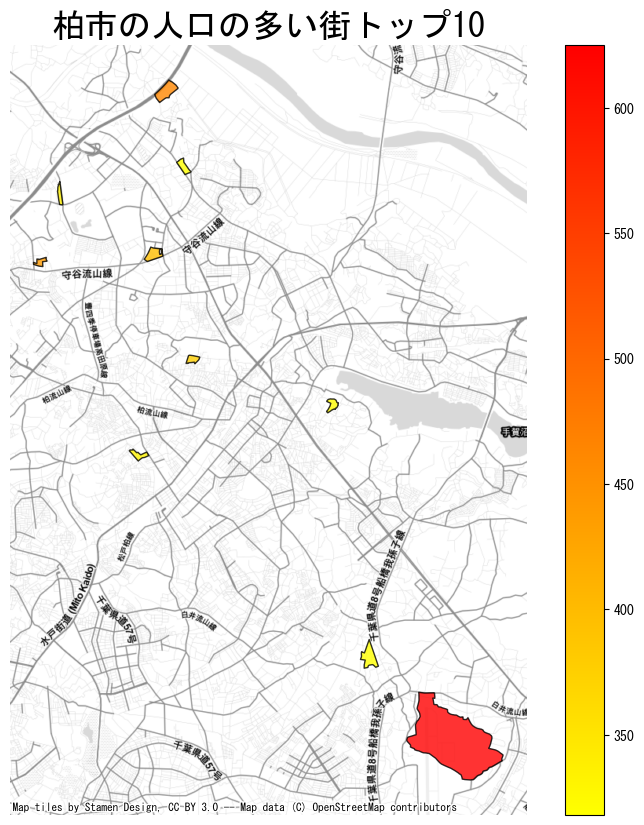

In [53]:
# population map
ax = gdf.head(10).plot(figsize=(10,10),
         column='JINKO',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=1,
         alpha=0.8)

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口の多い街トップ10',fontsize=24);

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

# Exercise

「SETAI」を示すトップ１０チャートと地図を作成しましょう。 それに応じてタイトルを変更してください。 マップのさまざまな色を試してください。

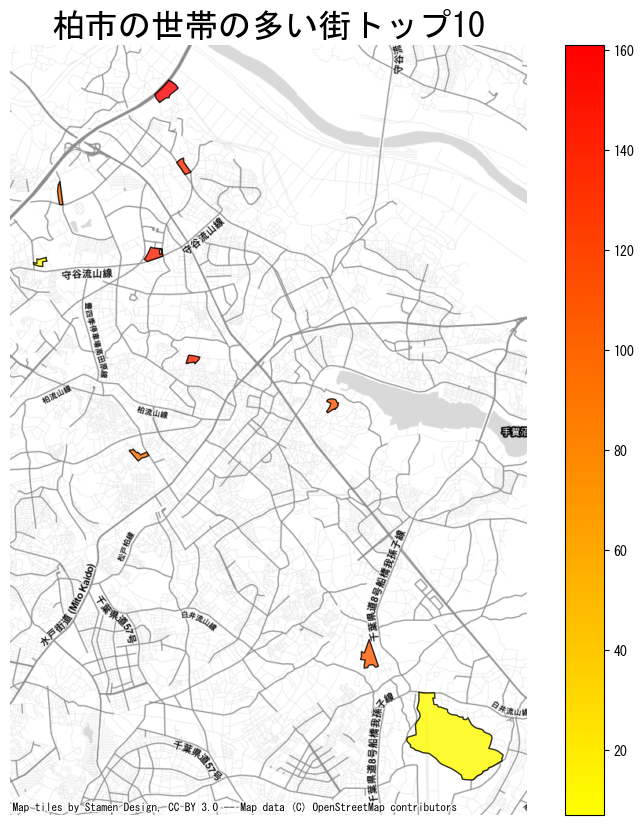

In [60]:
# population map
ax = gdf.head(10).plot(figsize=(10,10),
         column='SETAI',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=1,
         alpha=0.8)

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の世帯の多い街トップ10',fontsize=24);

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)